In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

from src.pbn_gen import PbnGen

In [249]:
pbn = PbnGen("images/red_panda.jpg")
pbn.set_final_pbn()

Quantized to 14 colors
Starting pruning... 
Iteration (of 6): 1 2 3 4 5 6 
Done!


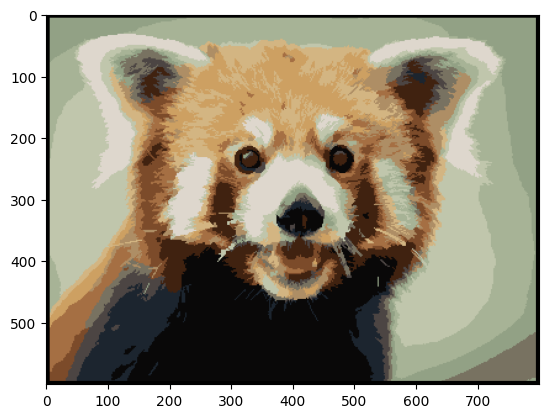

In [250]:
plt.imshow(pbn.getImage())

In [253]:
palette = pbn.output_to_svg("path.svg")

315 shapes


In [14]:
pbn.blurImage_(blurType='median')


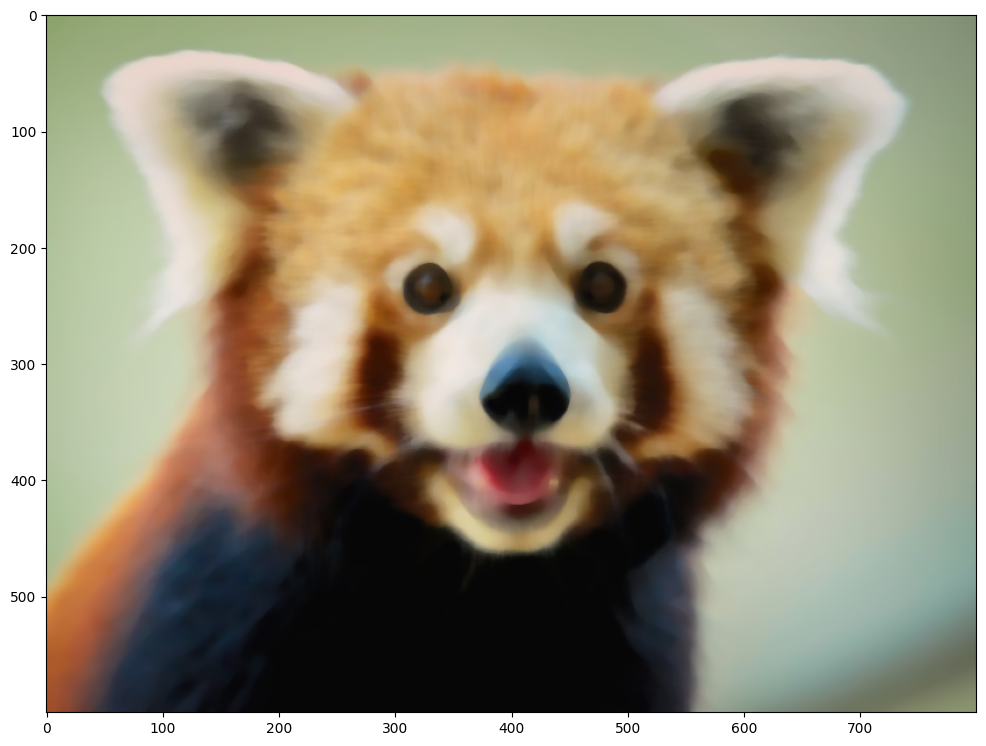

In [15]:
pbn.showImg()



In [16]:
colors, labels, q_img = pbn.cluster_colors()


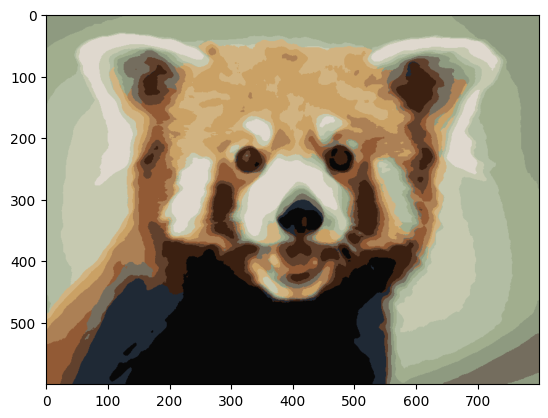

In [17]:
plt.imshow(q_img)

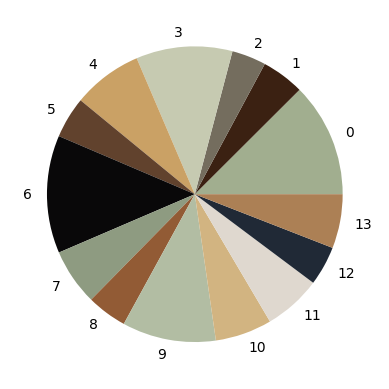

In [18]:
# make sure to run cluster colors first
pbn.plt_cluster_pie()

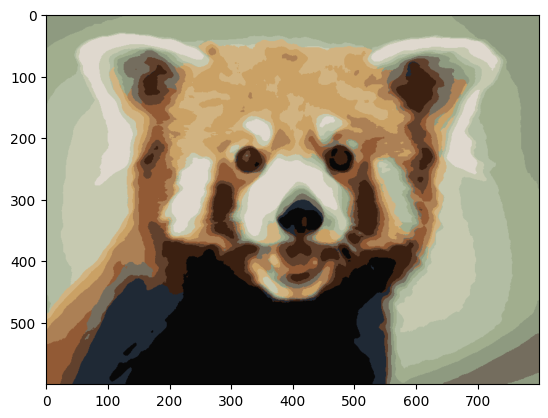

In [19]:
plt.imshow(q_img)

### The pruning process can take a while to run, especially if using bilateral filters, but can be sped up by downsampling the input and upsampling the output

Quantized to 50 colors


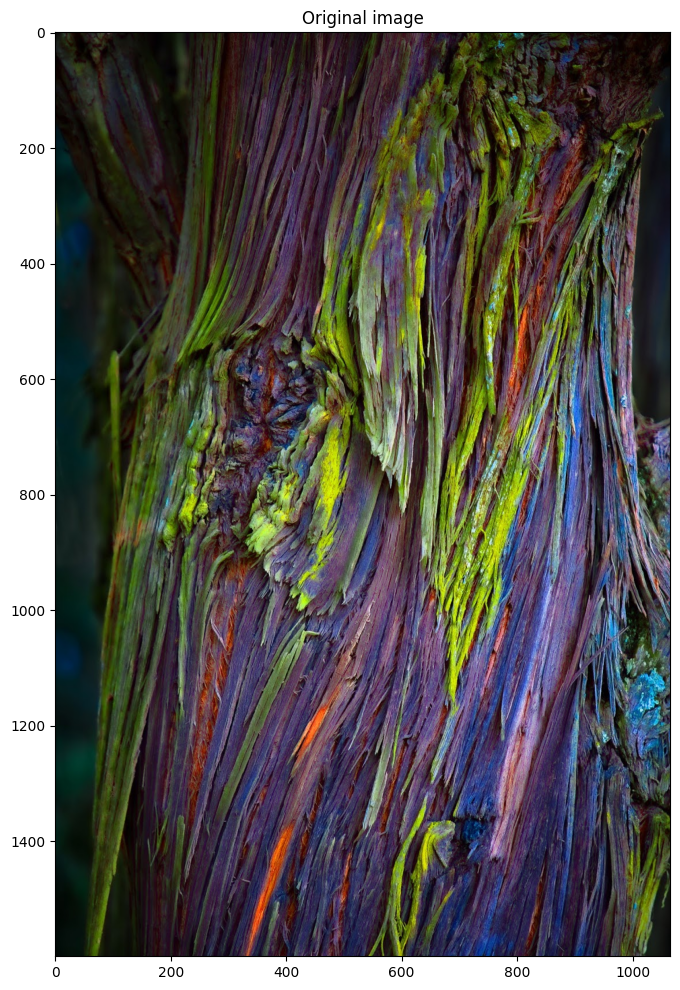

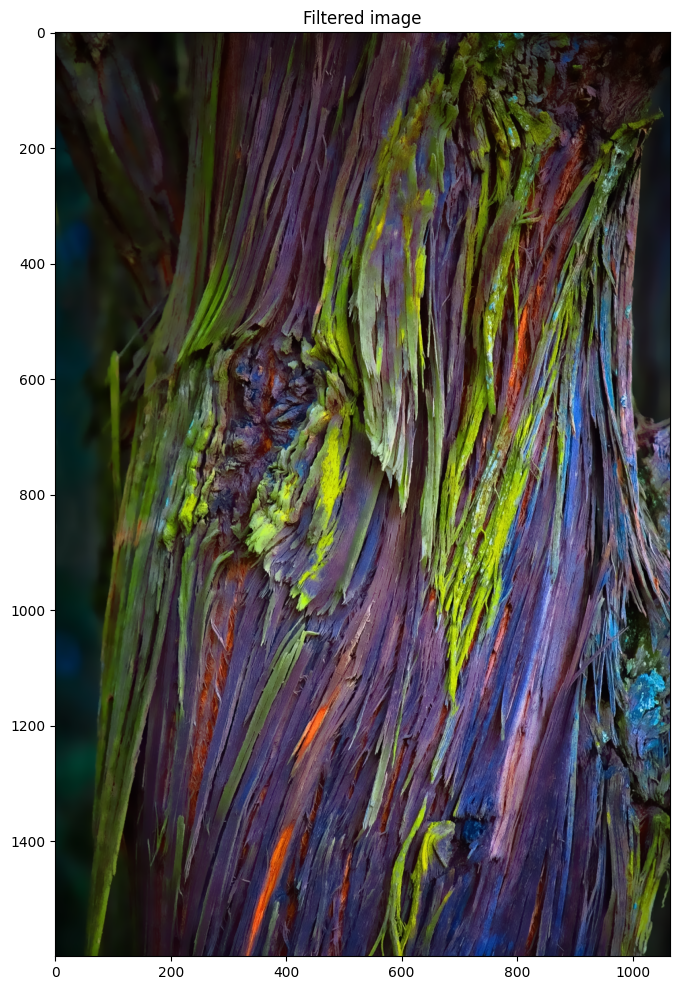

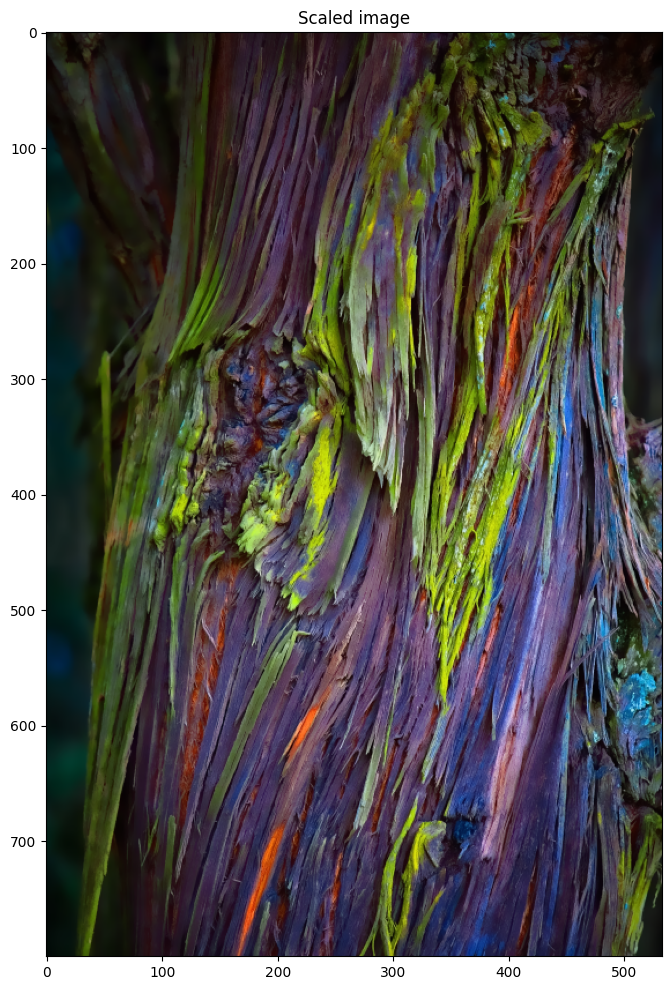

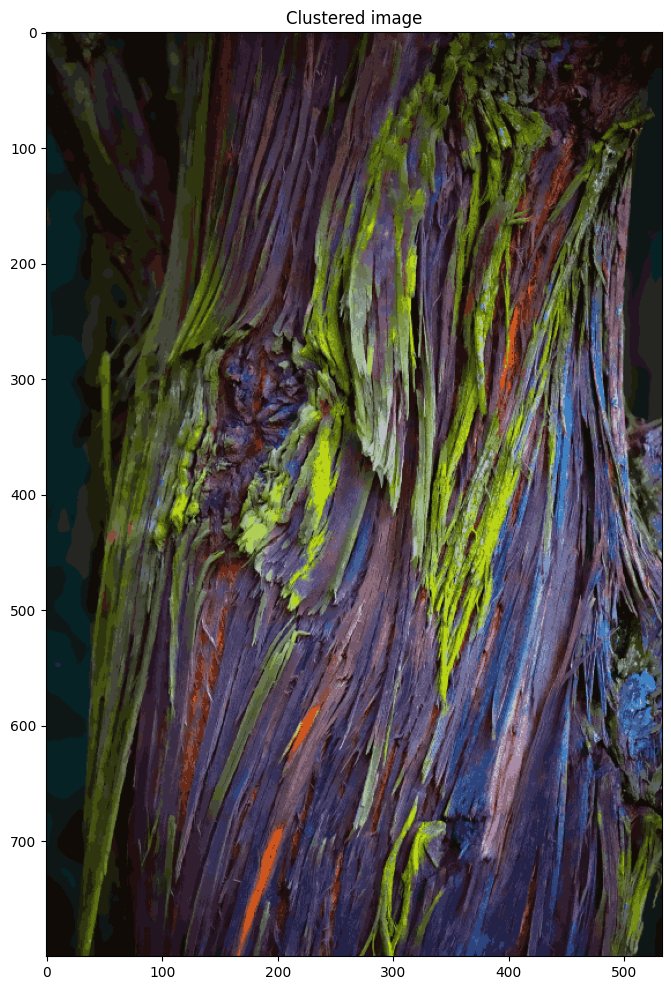

Starting pruning... 
Iteration (of 6): 1 2 3 4 5 6 
Done!


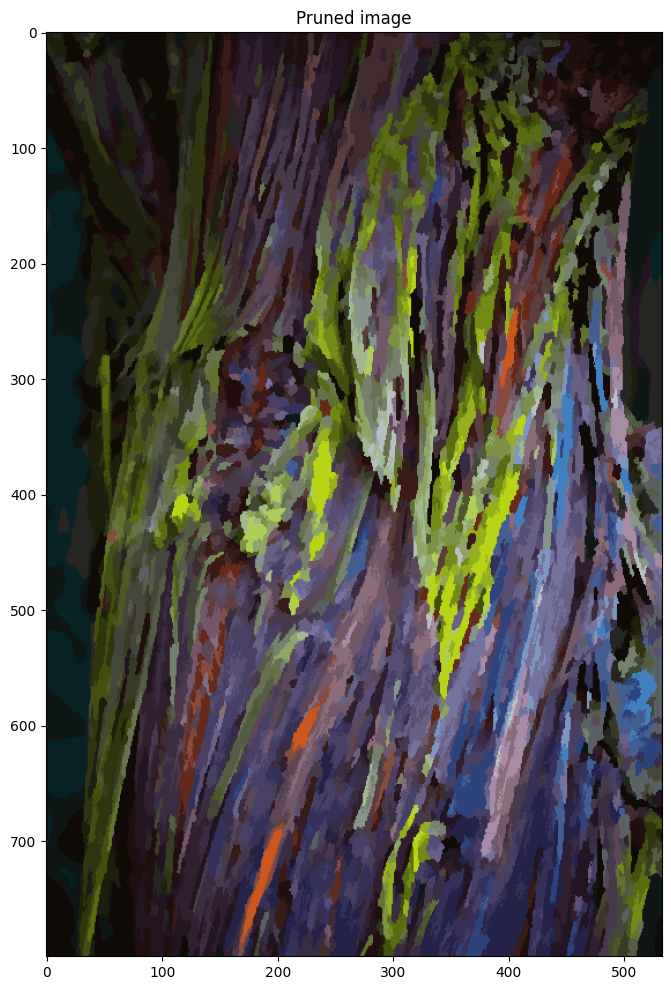

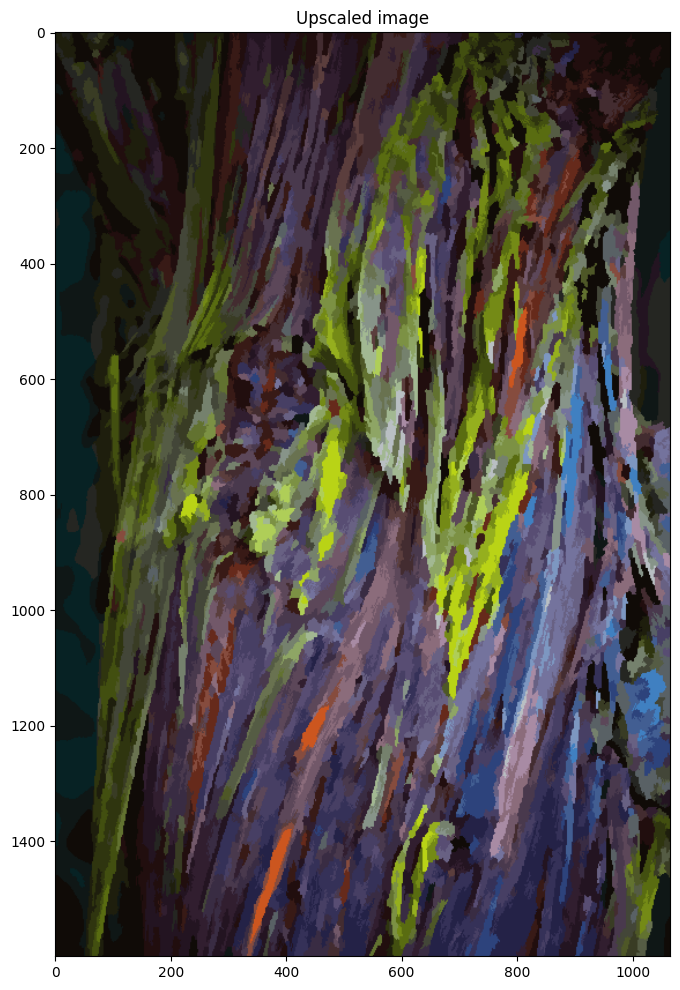

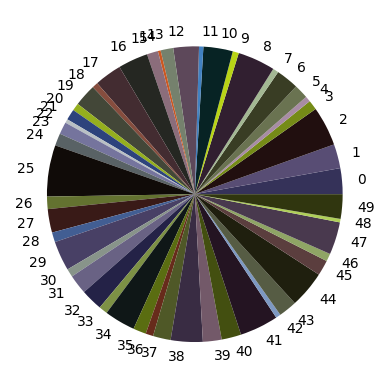

In [21]:
pbn = PbnGen("images/RainbowEucalyptus.jpg", num_colors=50)
pbn.showImg(title='Original image')

originalDims = pbn.getImage().shape[:-1]

pbn.blurImage_(blurType='bilateral', ksize=21, sigmaColor=21, sigmaSpace=14)
pbn.showImg(title='Filtered image')

pbn.resizeImage_(0.5)
pbn.showImg(title='Scaled image')

pbn.cluster_colors_()
pbn.showImg(title='Clustered image')



pbn.pruneClustersSimple(iterations=6)
pbn.showImg(title='Pruned image')

pbn.resizeImage_(dimension=originalDims)
pbn.showImg(title='Upscaled image')

pbn.plt_cluster_pie()